# The spark Foundation: Graduate Rotational Internship Program

## GRIP - Data Science And Buisness

### Name- Pradnya Mali

## Task-1: Prediction Using Supervised Machine Learning

#### Import the libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df= pd.read_csv(url)

<IPython.core.display.Javascript object>

In [2]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# There are 25 instances and 2 features.The target column is scores, which shows integer values.

# check size shape

In [7]:
df.size

50

In [8]:
df.shape

(25, 2)

# Univariate analysis 

In [9]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
### check the sqewness
#### 1.Bar ploot
#### 2.hist plot
#### 3.dist plot

<IPython.core.display.Javascript object>

C:\Users\Pradnya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


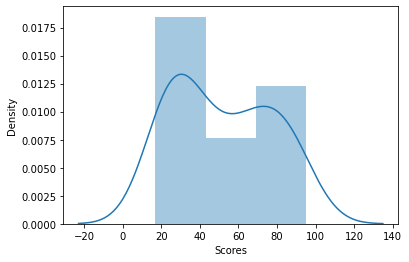

In [11]:
sns.distplot(df['Scores']);   # Scores is target column

# conclusion: It is uniformly distributed.

# Bivariate Analysis

In [12]:
## cheack the corelation between the columns
#### done by
#### 1.heat map
#### 2.pairplot
#### 3.box plot
#### 4.violin plot

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<IPython.core.display.Javascript object>

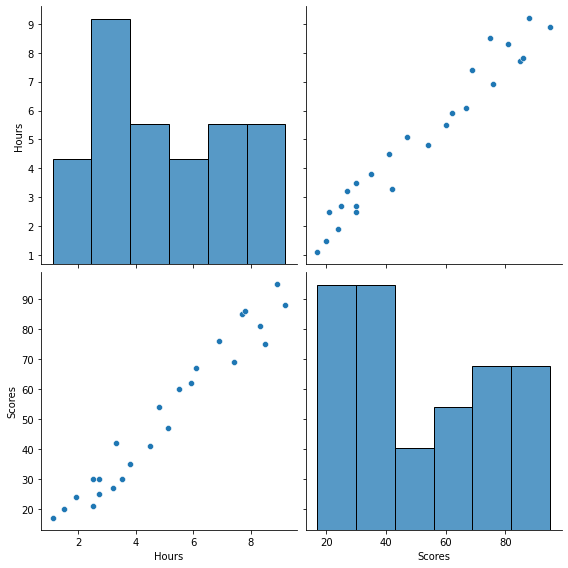

In [14]:
sns.pairplot(df,height = 4,aspect=1);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

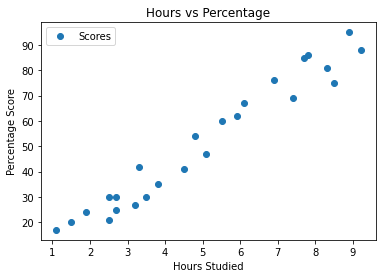

In [38]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
#conclusion: The visualisation graph shows positive corelation between houres studied and Precentage Score.

In [ ]:
sns.heatmap(df.corr(),annot = True);

# conclsion: Hours is highly correated shows 0.98 upto 1.

# Handle missing values

In [16]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [17]:
# conclusion: There is no missing values.

In [18]:
### Data is ready to learn from algorithum.

# Handle categorial values

# Dataset cant show categorical values.

In [19]:
# Model building

In [21]:
# Hours is a X and y will be Scores i.e. Target column

# import model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# select X any y

In [23]:
#Step 1: select dependent and independent variables (ie. x and y)
#setting the value for x and y

X= df[['Hours']]
y = df['Scores']

## bifurcation of data into train and test data
#### type of sampling:
##### 1.simple random
##### 2.clustering
##### 3.Stratified

In [24]:
### Random sampling
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [25]:
# simple Linear Regression

In [26]:
# Step 3: Model Instantiation
slr=LinearRegression()

In [27]:
# Step 4: fit the model with train data
slr.fit(X_train,y_train)

LinearRegression()

In [28]:
# Printing the model coefficients
print('Intercept:',slr.intercept_)
print('Coefficient:',slr.coef_)

Intercept: 2.826892353899737
Coefficient: [9.68207815]


### line of best fit

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

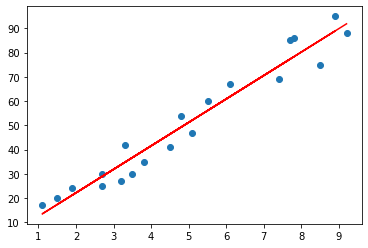

In [30]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 2.82 + 9.68 * X_train,'r')
plt.show();

In [32]:
# prediction of testand training set result
y_pred_slr = slr.predict(X_test)


In [33]:
# actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff.head(5)

<IPython.core.display.Javascript object>

,Actual value,Predicted value
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


# predict the training and testing value by R2_Score

In [35]:
from sklearn.metrics import r2_score
y_test_pred = slr.predict(X_test)

y_train_pred = slr.predict(X_train)
a = r2_score(y_train,y_train_pred)
b = r2_score(y_test,y_test_pred)
print('Training = {} testing = {}'.format(a,b))

Training = 0.9491209376364416 testing = 0.9678055545167994


# Conclusion : 96.78% of the data fit the regression model.

In [36]:
### 0 means the model is perfect. therefore the value should be as close to 0 as possible

In [37]:
meanAbErr = metrics.mean_absolute_error(y_test,y_test_pred)
meanSqerr = metrics.mean_squared_error(y_test,y_test_pred)
rootMeanSqErr = np.sqrt(meanSqerr)
print('Mean Absolute Error:',meanAbErr)
print('mean Squared Error:',meanSqerr)
print('Root Mean Squared Error:',rootMeanSqErr)

<IPython.core.display.Javascript object>

Mean Absolute Error: 3.9207511902099244
mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


# Thank You